In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("res1.csv", delimiter=";")

In [8]:
data["Dataset"] = data["Dataset"].replace("FGVCAircraft\t\t", "FGVCAircraft") 

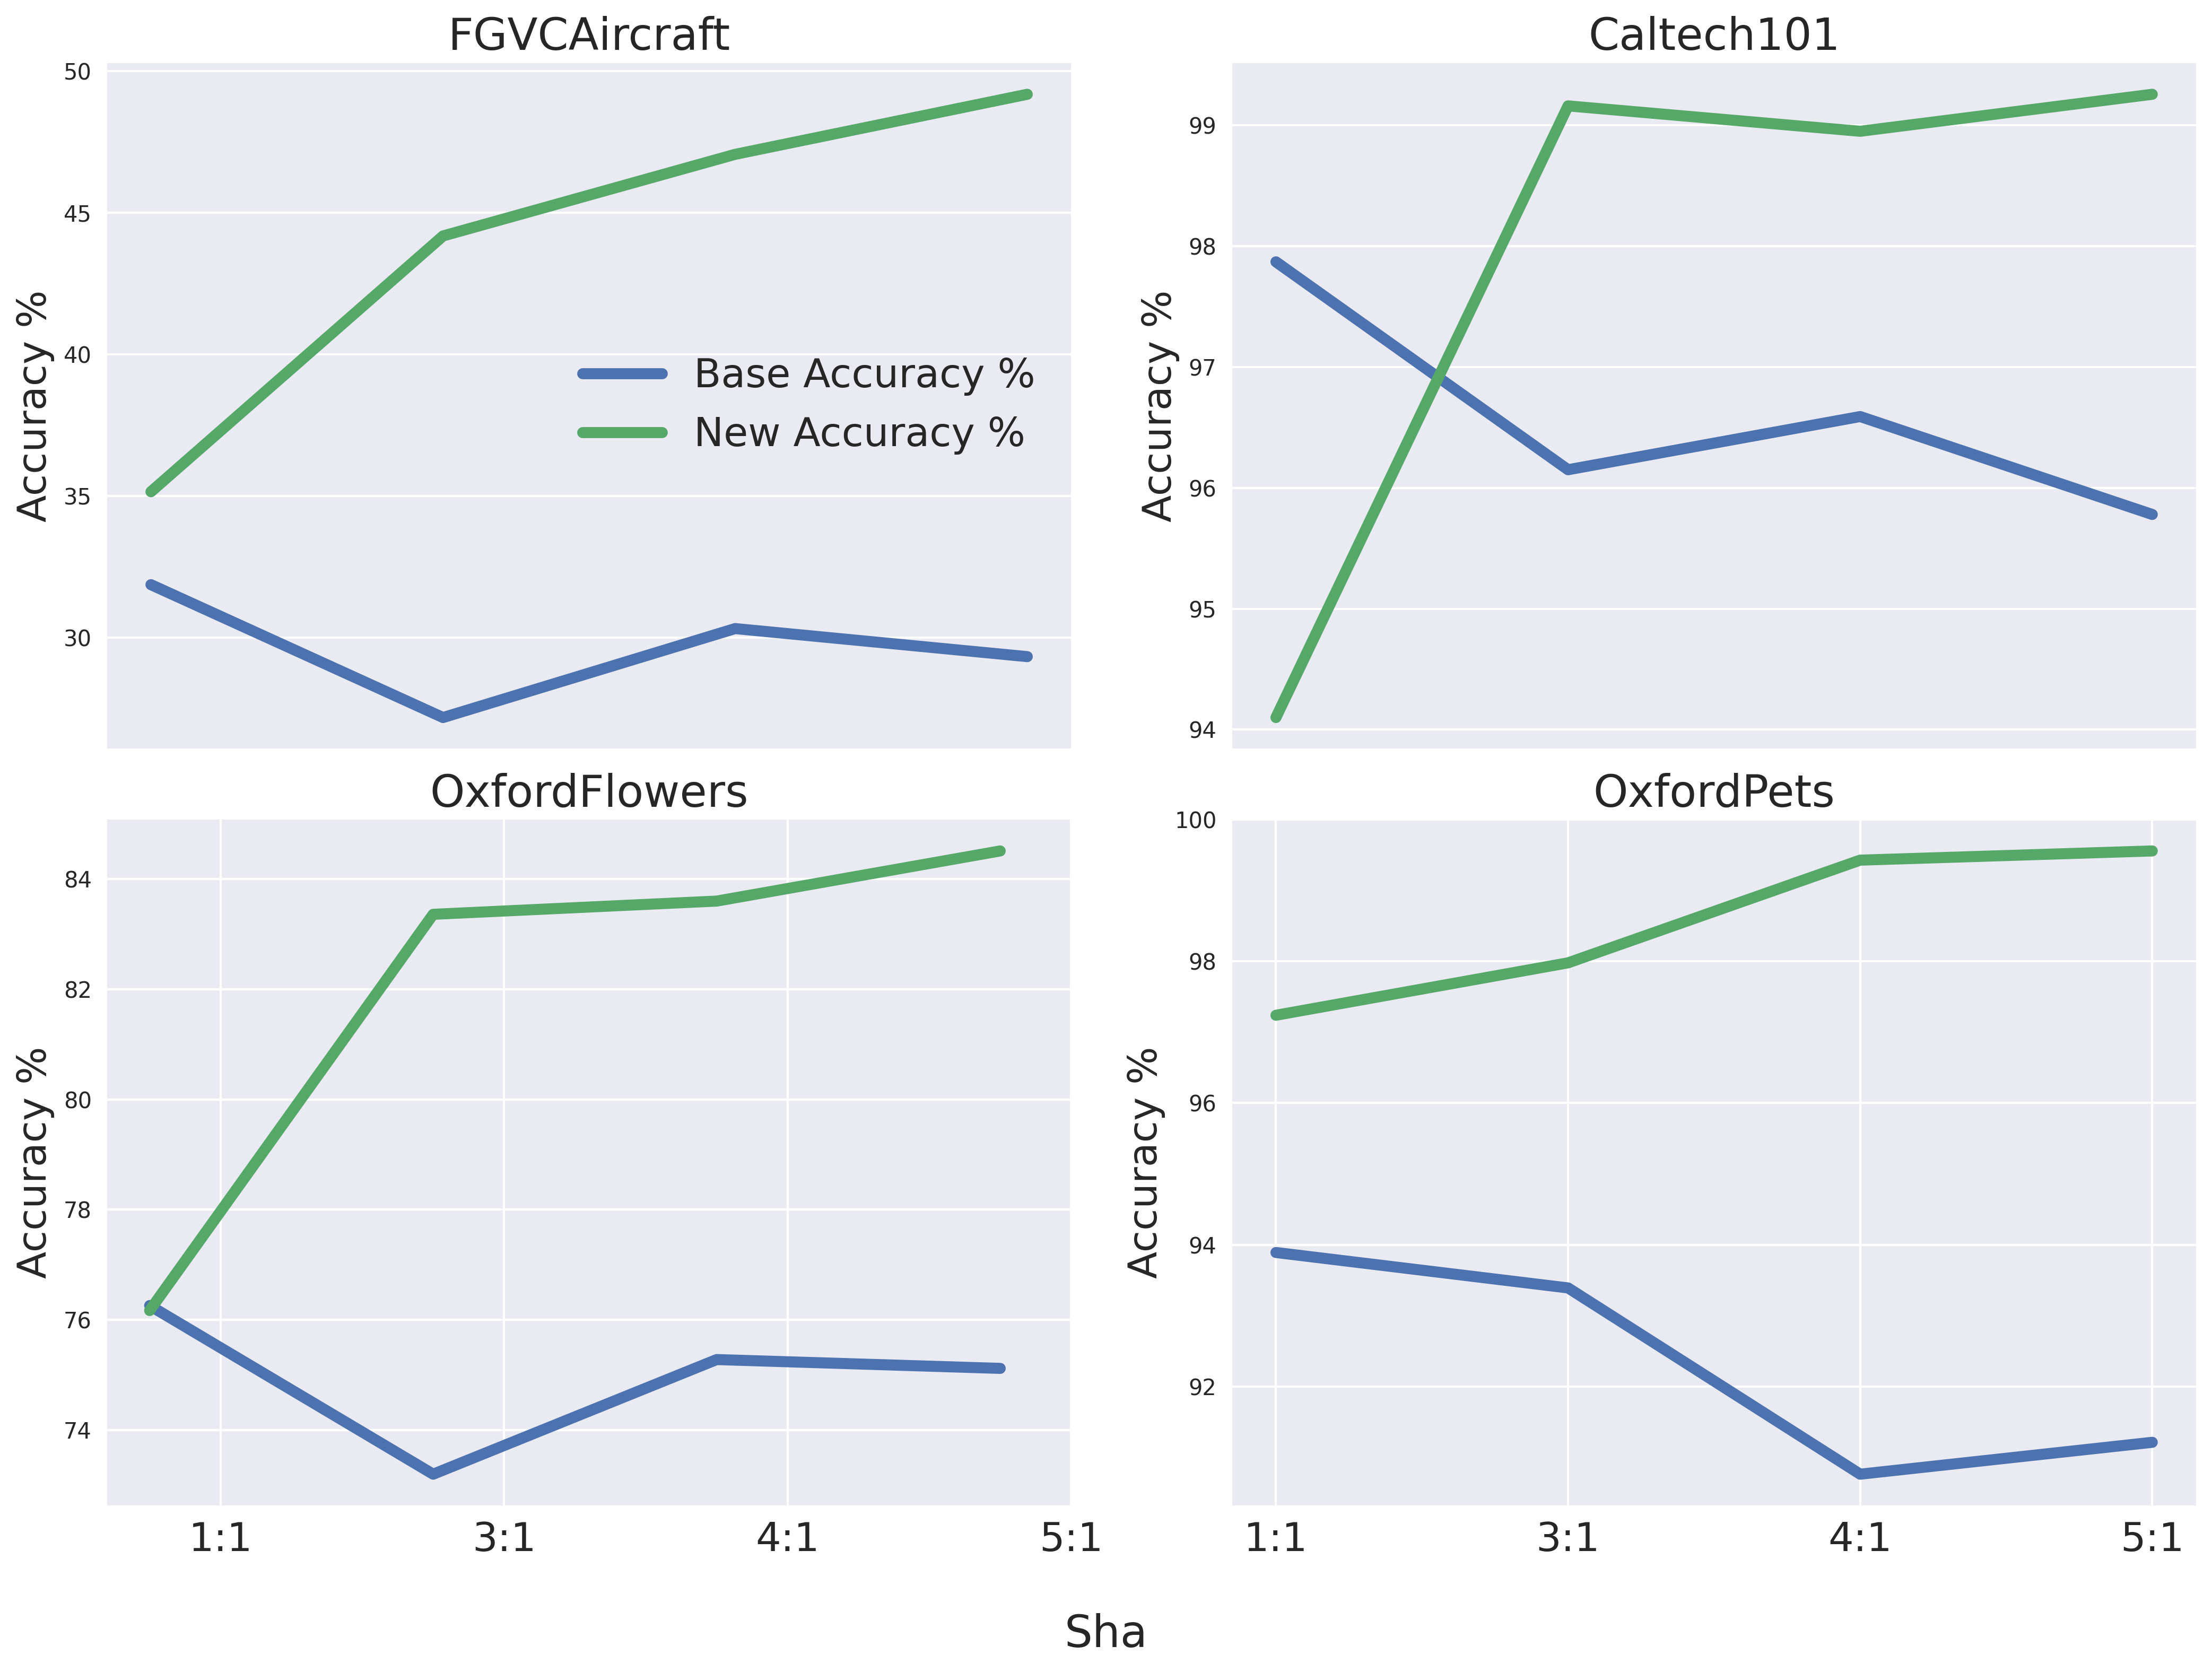

In [9]:
import matplotlib.pyplot as plt

datasets = ["FGVCAircraft", "Caltech101", "OxfordFlowers", "OxfordPets"]



plt.style.use("seaborn-v0_8")

# Parameters for font size and line width
font_size = 18
title_size = 20
line_width = 5

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10), dpi=300)  # Adjust the figure size as necessary

for idx, (ax, dataset) in enumerate(zip(axs.flatten(), datasets)):
    df = data.loc[data["Dataset"] == dataset]
    
    # Plotting the data
    ax.plot(df.index, df["Base acc %"], label='Base Accuracy %', linewidth=line_width)
    ax.plot(df.index, df["New acc %"], label='New Accuracy %', linewidth=line_width)

    # Setting the y-axis label
    ax.set_ylabel('Accuracy %', fontsize=font_size)

    # Adding the title
    ax.set_title(dataset, fontsize=title_size)
    
    # Add the legend only for the first subplot
    if idx == 0:
        ax.legend(fontsize=font_size)

# Set the x-axis labels and ticks only for the bottom row subplots
for i in range(2):  # Loop over the columns of the bottom row
    axs[1, i].set_xticks(df.index)
    axs[1, i].set_xticklabels(["1:1", "3:1", "4:1", "5:1"], fontsize=font_size)

# Remove x-axis labels and ticks from the top row subplots
for i in range(2):  # Loop over the columns of the top row
    axs[0, i].set_xticks([])
    axs[0, i].set_xticklabels([])

# Adjust layout to prevent overlap
plt.tight_layout()
fig.text(0.5, -0.04, 'Sha', ha='center', fontsize=20)

# Display the plot
plt.savefig("split_ab.pdf")